AVG check is: 7014.35
Top-5 products by profit:
 product
Tablet        205331
Headphones    173719
Smartphone    169252
Laptop        153133
Name: total_sales, dtype: int64


/tmp/ipykernel_8323/2578138098.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="viridis")


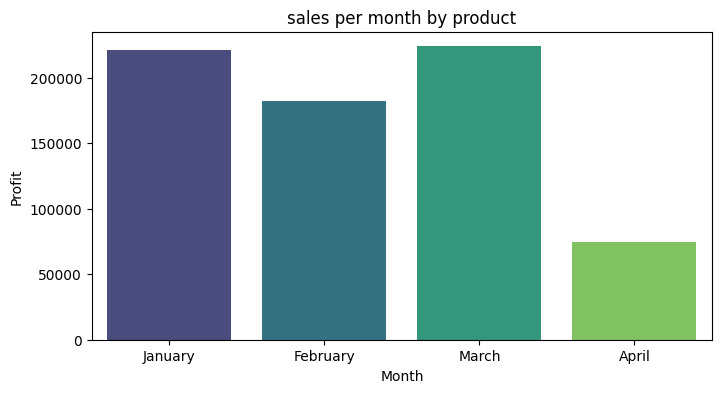

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# data generate
np.random.seed(42)
data = {
    "date": pd.date_range(start="2023-01-01", periods=100, freq="D"),
    "product":np.random.choice(["Laptop", "Smartphone", "Tablet", "Headphones"], 100),
    "category":np.random.choice(["Electronics", "Accessories"], 100),
    "price":np.random.randint(500, 3999, 100),
    "quantity":np.random.randint(1, 6, 100)
}
df = pd.DataFrame(data)

# add column "total sales"
df["total_sales"] = df["price"] * df["quantity"]

# avg_check
avg_check = df["total_sales"].mean()
print(f"AVG check is: {avg_check:.2f}")

# top5
top_products = df.groupby("product")["total_sales"].sum().sort_values(ascending=False)
print("Top-5 products by profit:\n", top_products.head(5))

# sales per month
df["month"] = df["date"].dt.month
monthly_sales = df.groupby("month")["total_sales"].sum()

# calendar
monthly_sales.index = monthly_sales.index.map(lambda x: calendar.month_name[x])

#visual
plt.figure(figsize=(8, 4))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="viridis")
plt.title("sales per month by product")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.show()


